<a href="https://colab.research.google.com/github/CopotronicRifat/CS-5783-Machine-Learning-Assignments/blob/main/ML_ASSIGNMENT_1_PROBLEM_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Take Assignment1_Q2_Data.csv for question 2 from local drive

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Assignment1_Q2_Data.csv to Assignment1_Q2_Data.csv
User uploaded file "Assignment1_Q2_Data.csv" with length 1383 bytes


In [ ]:
import io
import pandas as pd
df = pd.read_csv(io.BytesIO(uploaded[fn]))

In [ ]:
# Feature Normalization

df = (df - df.mean())/df.std()

In [ ]:
print(df.head(5))

   House ID  Local Price  Bathrooms  Land Area  Living area  # Garages  \
0 -1.641143    -0.779386  -0.639215  -1.228089    -0.937655   -0.51927   
1 -1.519577    -0.744480  -0.639215  -1.203847    -0.021318    1.01121   
2 -1.398011    -0.906124  -0.639215  -1.719924    -0.614564   -0.51927   
3 -1.276444    -0.901254  -0.639215  -0.990595    -0.510518   -0.51927   
4 -1.154878    -0.731323  -0.639215  -0.824185    -0.713134   -0.51927   

    # Rooms  # Bedrooms  Age of home  Construction type  Architecture type  \
0  0.277952    1.002230     0.411002            0.60678          -0.377189   
1  0.277952    1.002230     1.858558           -1.01130          -0.377189   
2 -0.586788   -0.400892     0.266247           -0.20226          -0.377189   
3 -0.586788   -0.400892     1.279535            1.41582          -0.377189   
4 -0.586788   -0.400892     0.411002            0.60678          -0.377189   

   # Fire places  Price (1000$)  
0      -0.675845      -0.865814  
1      -0.675845  

In [ ]:
# get value from dataframe
X = df.values[:,1:12]
y =  df.values[:, -1]

In [ ]:
print(X)
print(y)

[[-0.7793864  -0.63921486 -1.22808947 -0.93765475 -0.51927014  0.277952
   1.00222966  0.4110023   0.60677988 -0.37718916 -0.67584534]
 [-0.74448022 -0.63921486 -1.203847   -0.02131774  1.01121026  0.277952
   1.00222966  1.85855758 -1.01129979 -0.37718916 -0.67584534]
 [-0.90612422 -0.63921486 -1.71992399 -0.61456381 -0.51927014 -0.58678755
  -0.40089186  0.26624677 -0.20225996 -0.37718916 -0.67584534]
 [-0.90125359 -0.63921486 -0.99059545 -0.51051758 -0.51927014 -0.58678755
  -0.40089186  1.27953547  1.41581971 -0.37718916 -0.67584534]
 [-0.73132276 -0.63921486 -0.82418527 -0.71313393 -0.51927014 -0.58678755
  -0.40089186  0.4110023   0.60677988 -0.37718916 -0.67584534]
 [-1.12662165 -0.63921486 -0.82418527 -0.95590848 -0.51927014 -0.58678755
  -0.40089186  1.42429099 -0.20225996 -0.37718916 -0.67584534]
 [-0.44777774 -0.63921486 -0.25099467 -0.4959146  -0.51927014  0.277952
  -0.40089186  1.06240218 -0.20225996 -0.37718916  1.4267846 ]
 [-0.54725358 -0.63921486  1.25696912 -0.019492

In [ ]:
# get the number of datapoints
m = len(y)
print(m)

28


In [ ]:
# add coulumn of 1 for dimention match

import numpy as np
X = np.hstack((np.ones((m,1)), X))

In [ ]:
#setting the matrixes
X = df.iloc[:,1:12]
ones = np.ones([X.shape[0],1])
X = np.concatenate((ones,X),axis=1)

y = df.iloc[:, -1].values 
theta = []
import random
for i in range(12):
    num = random.randint(0, 10)
    theta.append(num)

print(theta)

[5, 0, 6, 4, 6, 10, 8, 0, 4, 7, 3, 3]


In [ ]:
# computecost
def computeCost(X,y,theta):
    tobesummed = np.power(((X @ theta.T)-y),2)
    return np.sum(tobesummed)/(2 * len(X))

In [ ]:
n = 100
alpha = 0.1

In [ ]:
# Problem 2.1
# Average Least-Square errors 

import numpy as np
#gradient descent
def gradientDescent(X,y,theta,n,alpha):
    cost = np.zeros(n)
    for i in range(n):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * X.transpose().dot(errors);
        theta = theta - sum_delta;
        cost[i] = computeCost(X, y, theta)
    
    return theta,cost

#running the gd and cost function
g,cost = gradientDescent(X,y,theta,n,alpha)
print("Final values of theta after all iteration: ",t)

finalCost = computeCost(X,y,g)
print("Average Lease-Square error is: ",finalCost)


Final values of theta after all iteration:  [ 1.32806994e-04 -2.15329938e+00  2.01298445e+00  2.91988651e-01
  1.28988739e+00  8.84198804e-01  1.88901837e+00 -2.84748640e+00
  6.44735566e-02  2.90434775e-01 -4.61973674e-03 -3.31583259e-01]
Average Lease-Square error is:  0.631114836430566


**Answer 2.1**

Average Lease-Square error is:  0.631114836430566

**N.B.: Please note that, I have used sklearn package not implementing the linear regression but ONLY to get the most effective feature.**

**Also, in question 2, there is NO restriction mentioned for using sklearn package. **

Feature: 0, Score: 0.00
Feature: 1, Score: 0.18
Feature: 2, Score: 0.27
Feature: 3, Score: 0.03
Feature: 4, Score: 0.52
Feature: 5, Score: 0.09
Feature: 6, Score: -0.09
Feature: 7, Score: -0.02
Feature: 8, Score: -0.07
Feature: 9, Score: 0.09
Feature: 10, Score: 0.05
Feature: 11, Score: 0.09


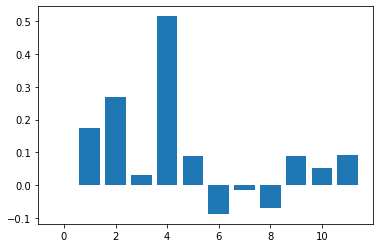

In [ ]:
# Problem 2.2: 

from sklearn.linear_model import LinearRegression
from matplotlib import pyplot

model = LinearRegression()
model.fit(X, y)
importance = model.coef_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.2f' % (i,v))
 
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

**Answer 2.2**

From the above data, we can see that Feature 4, i.e. **Living Area** is the most effective factor on the final value.

As it can be seen from above barchart graph, it has the highest value.

I cannot use only this feature to predict the price. Because, there are other important positive effective values there, such as Local Price and Bathroom etc.

**Answer 2.3**
From the above chart we can see that feature 6, i.e. **# Rooms** has the least effect on the final value.

As it can be seen from above barchart graph, it has the lowest value.

As this feature has a negative importance value, removing this feature will improve the performance of the model.